In [13]:
import pandas as pd #FOR DATA ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns #FOR ADV VISUALIZATION
from sklearn.model_selection import train_test_split #FOR ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
weather_data=pd.read_csv("/content/seattle-weather.csv")

In [6]:
weather_data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [7]:
weather_data.duplicated()
weather_data.drop_duplicates()
weather_data.notnull().sum()

,0
date,1461
precipitation,1461
temp_max,1461
temp_min,1461
wind,1461
weather,1461


In [8]:
weather_data.drop("date",axis=1,inplace=True)

In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [10]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [11]:
weather_data

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1458,0.0,7.2,0.6,2.6,fog
1459,0.0,5.6,-1.0,3.4,sun


<Axes: xlabel='temp_max', ylabel='Count'>

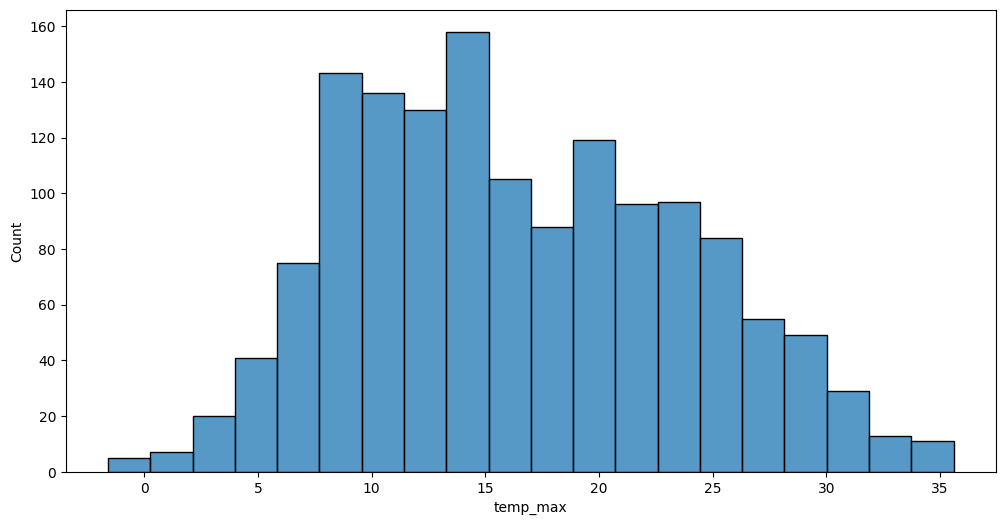

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather_data,x=weather_data.temp_max,bins=20)

In [15]:
# Define features and target
x = weather_data.drop("weather", axis=1)#FEATURES or INPUTS
y = weather_data["weather"]#TARGET or OUTPUT

In [16]:
from sklearn.preprocessing import LabelEncoder #FOR CONVERTING CATEGORICAL VALUE TO NUMERIC VALUE

# Encode the target variable "y=weather"
le = LabelEncoder()
y = le.fit_transform(y)
y           #numerical y

array([0, 2, 2, ..., 1, 4, 4])

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
print("X_train shape=",X_train.shape)
print("X_test shape=",X_test.shape)
print("Y_train shape=",y_train.shape)
print("Y_test shape=",y_test.shape)

X_train shape= (1168, 4)
X_test shape= (293, 4)
Y_train shape= (1168,)
Y_test shape= (293,)


In [19]:
# Initialize and train the model-CLASSIFICATION
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Make predictions
y_pred = logreg.predict(X_test)
y_pred

array([4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 3, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4,
       2, 4, 4, 2, 4, 2, 4])

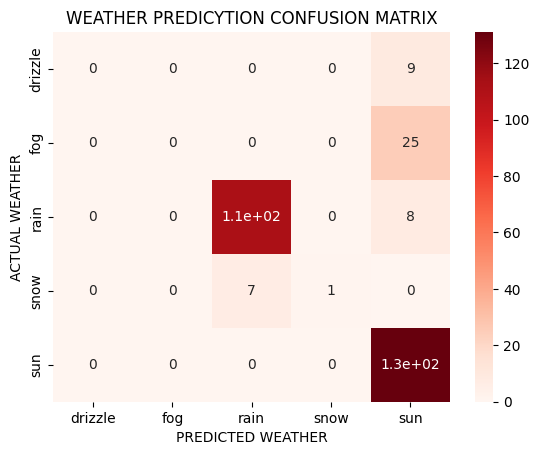

In [21]:
con=confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
sns.heatmap(con, annot=True,  xticklabels=le.classes_, yticklabels=le.classes_,cmap="Reds")
plt.xlabel('PREDICTED WEATHER')
plt.ylabel('ACTUAL WEATHER')
plt.title('WEATHER PREDICYTION CONFUSION MATRIX')
plt.show()

In [22]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 112   0   8]
 [  0   0   7   1   0]
 [  0   0   0   0 131]]


In [23]:
# Classification report
cr = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report:")
print(cr)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.94      0.93      0.94       120
           3       1.00      0.12      0.22         8
           4       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.94      0.41      0.40       293
weighted avg       0.87      0.83      0.78       293



In [24]:

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.8327645051194539


In [25]:
y_test

array([4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 1, 2, 4, 1, 1, 4, 2, 2,
       2, 4, 1, 2, 4, 4, 1, 4, 2, 4, 4, 3, 4, 2, 2, 2, 2, 4, 2, 4, 1, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 3, 4, 4, 0,
       2, 4, 2, 2, 2, 1, 4, 2, 2, 4, 2, 4, 2, 3, 2, 0, 2, 4, 2, 4, 0, 2,
       1, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 3, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 0, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 4, 2, 2, 2, 4, 0, 4, 2, 2, 0, 1, 4, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 1, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 1, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 0, 1, 4, 2, 1, 4, 1, 2,
       3, 2, 2, 4, 0, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 1, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 0, 1, 3, 2,
       4, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 1, 4, 1, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 4, 4, 4, 4, 2, 4, 4, 2, 3, 4, 4, 1, 2, 4, 4, 4, 4,
       2, 4, 4, 2, 1, 2, 4])

In [26]:
y_pred

array([4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4,
       2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 3, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4,
       2, 4, 4, 2, 4, 2, 4])

In [28]:
#TO TEST UNSEEN DATA
new_data = pd.DataFrame({
    'precipitation': [10.8, 10.0],
    'temp_max': [10.6, 10.2],
    'temp_min': [2.5, 2.7],
    'wind': [4.5, 4.4]

})

# Predict on the new, unseen data
new_predictions = logreg.predict(new_data)


print("New data predictions:", new_predictions)


New data predictions: [2 2]


In [32]:
print("Features or Input \n________________\n")
new_data

Features or Input 
________________



,precipitation,temp_max,temp_min,wind
0,10.8,10.6,2.5,4.5
1,10.0,10.2,2.7,4.4


In [33]:
new_data["weather"]=new_predictions
print("Features with target weather ")
new_data

Features with target weather 


,precipitation,temp_max,temp_min,wind,weather
0,10.8,10.6,2.5,4.5,2
1,10.0,10.2,2.7,4.4,2


In [34]:
decoded_predictions = le.inverse_transform(new_predictions)
new_data["weather"]=decoded_predictions
new_data

,precipitation,temp_max,temp_min,wind,weather
0,10.8,10.6,2.5,4.5,rain
1,10.0,10.2,2.7,4.4,rain
